# Predicting the outcome of a NBA match

analyze various factors and make predictions based on historical data. & predicting the outcome of a NBA match using deferent classification models and comapre the performance metrics between them

In [1]:
# instalations
!pip install imbalanced-learn

!pip install openpyxl



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
# Imports: 

import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt

import seaborn as sns


import numpy as np

from sklearn.model_selection import train_test_split




## 1. Data Importing and Cleaning:

### 1.1 Importing & Exploring

In [3]:
import pandas as pd

#Games dataset
dataset_path = "/Users/wafaabajjouk/ML_PROJECT/games.csv"
df = pd.read_csv(dataset_path)

df.head() 


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


In [4]:
# Teams Dataset
dataset_path = "/Users/wafaabajjouk/ML_PROJECT/teams.csv"
df = pd.read_csv(dataset_path)

df.head() 

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


### 1.2 Cleaning 

#### Replacing the teams ID with their respective team names 



The ID culumns ('HOME_TEAM_ID' and 'VISITOR_TEAM_ID') are in games.csv .

The Teams names culumn ('NICKNAME') is in team.csv

We will replace the team IDs in the HOME_TEAM_ID and VISITOR_TEAM_ID columns of the games.csv dataset with their respective team names from the team.csv dataset

The changes will be saved in seperated new excel file 

The name culums are visitor_team and home_team

In [5]:
games_df = pd.read_csv('games.csv')
teams_df = pd.read_csv('teams.csv')

team_id_to_name = dict(zip(teams_df['TEAM_ID'], teams_df['NICKNAME']))

games_df['HOME_TEAM_ID'].replace(team_id_to_name, inplace=True)
games_df.rename(columns={'HOME_TEAM_ID': 'home_team'}, inplace=True)

games_df['VISITOR_TEAM_ID'].replace(team_id_to_name, inplace=True)
games_df.rename(columns={'VISITOR_TEAM_ID': 'visitor_team'}, inplace=True)

output_file = 'games_cleaned.csv'
games_df.to_csv(output_file, index=False)
games_df.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


### Drop rows with NaN values

In [6]:
columns_to_check = ['TEAM_ID_home', 'TEAM_ID_away', 'PTS_home', 'PTS_away']
dataset_cleaned = games_df.dropna(subset=columns_to_check)
games_df.head()



,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


## 2.Data Statistics 


#### 2.1 Calculate the winning probabilities based on historical data:

- calculating the probabilities of winning for each team as the home team and as the visitor team
- Storing the new data in new dataframes


In [7]:
total_games = len(games_df)

team_wins = pd.concat([games_df['home_team'], games_df['visitor_team']]).value_counts()
team_win_percentage = (team_wins / total_games) * 100

team_win_percentage_df = pd.DataFrame({
    'Team': team_win_percentage.index,
    'Win_Pct': team_win_percentage.values
})

games_df['Win_Pct'] = games_df['home_team'].map(team_win_percentage)  # Add win percentage column to games_df

team_win_percentage_df.to_csv('games_cleaned.csv', index=False)  # Save team win percentages to CSV

games_df.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Win_Pct
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1,6.483809
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1,6.663915
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1,6.814003
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1,6.577614
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0,6.712694


In [8]:
import pandas as pd

# Calculate the total number of games
total_games = len(games_df)

# Count the number of wins for each team as a home team
home_team_wins = games_df['home_team'].value_counts()

# Count the number of wins for each team as a visitor
visitor_team_wins = games_df['visitor_team'].value_counts()

# Calculate the win percentage for each team as a home team
home_team_win_percentage = (home_team_wins / total_games) * 100

# Calculate the win percentage for each team as a visitor
visitor_team_win_percentage = (visitor_team_wins / total_games) * 100

# Create DataFrames with team and win percentage columns
home_team_win_percentage_df = pd.DataFrame({
    'Team': home_team_win_percentage.index,
    'Win_Pct_as_Home_Team': home_team_win_percentage.values
})

visitor_team_win_percentage_df = pd.DataFrame({
    'Team': visitor_team_win_percentage.index,
    'Win_Pct_as_Visitor_Team': visitor_team_win_percentage.values
})

# Add the win percentage columns to the games_df DataFrame
games_df = pd.merge(games_df, home_team_win_percentage_df, left_on='home_team', right_on='Team', how='left')
games_df = pd.merge(games_df, visitor_team_win_percentage_df, left_on='visitor_team', right_on='Team', how='left')

# Save the team win percentages to a CSV file
games_df.to_csv('games_cleaned.csv', index=False)

games_df.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,Win_Pct,Team_x,Win_Pct_as_Home_Team,Team_y,Win_Pct_as_Visitor_Team
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,0.815,0.321,23.0,44.0,1,6.483809,Pelicans,3.193126,Spurs,3.493302
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,0.765,0.333,20.0,37.0,1,6.663915,Jazz,3.279427,Wizards,3.361975
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,0.682,0.433,20.0,46.0,1,6.814003,Cavaliers,3.455780,Bucks,3.354471
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,0.735,0.261,15.0,46.0,1,6.577614,76ers,3.294435,Pistons,3.320701
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,0.773,0.292,20.0,47.0,0,6.712694,Hawks,3.313197,Bulls,3.268170


In [9]:
import pandas as pd

def calculate_elo_rating(win_percentage):
    base_elo_rating = 1500  # Initial Elo rating for all teams
    k_factor = 32  # The k-factor determines the weight of the game in the Elo rating system
    
    # Calculate the Elo rating based on the win percentage
    elo_rating = base_elo_rating + k_factor * (win_percentage - 0.5)
    
    return elo_rating

def add_elo_ratings(dataset, team1_column, team2_column):
    # Convert win percentage columns to numeric type
    dataset['Win_Pct_as_Home_Team'] = pd.to_numeric(dataset['Win_Pct_as_Home_Team'])
    dataset['Win_Pct_as_Visitor_Team'] = pd.to_numeric(dataset['Win_Pct_as_Visitor_Team'])
    
    # Calculate Elo rating for each team based on win percentages
    dataset['Elo_Home'] = dataset['Win_Pct_as_Home_Team'].map(calculate_elo_rating)
    dataset['Elo_away'] = dataset['Win_Pct_as_Visitor_Team'].map(calculate_elo_rating)
    
    return dataset

# Assuming you have a dataset named 'games_df' with columns 'home_team', 'visitor_team', 'HOME_TEAM_WINS',
# 'Win_Pct_as_Home_Team', 'Win_Pct_as_Visitor_Team', 'Win_Pct'

# Add Elo ratings to the games_df dataframe
games_df = add_elo_ratings(games_df, 'home_team', 'visitor_team')

csv_filename = 'games_cleaned.csv'

# Save the updated dataframe to the CSV file
games_df.to_csv(csv_filename, index=False)

# Print the updated dataframe
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_away,REB_away,HOME_TEAM_WINS,Win_Pct,Team_x,Win_Pct_as_Home_Team,Team_y,Win_Pct_as_Visitor_Team,Elo_Home,Elo_away
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,23.0,44.0,1,6.483809,Pelicans,3.193126,Spurs,3.493302,1586.180031,1595.785674
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,20.0,37.0,1,6.663915,Jazz,3.279427,Wizards,3.361975,1588.941653,1591.583205
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,20.0,46.0,1,6.814003,Cavaliers,3.455780,Bucks,3.354471,1594.584969,1591.343064
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,15.0,46.0,1,6.577614,76ers,3.294435,Pistons,3.320701,1589.421935,1590.262429
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,20.0,47.0,0,6.712694,Hawks,3.313197,Bulls,3.268170,1590.022288,1588.581442


In [34]:
import pandas as pd

def calculate_recent_performance(dataset, team_column, stat_columns, window_size=10):
    # Sort the dataset by date in descending order
    dataset = dataset.sort_values(by='GAME_DATE_EST', ascending=False)
    
    # Group the dataset by team and calculate the average stats over the window size
    grouped = dataset.groupby(team_column)[stat_columns].rolling(window=window_size, min_periods=1).mean()
    
    # Reset the index of the grouped dataframe
    grouped = grouped.reset_index(level=0, drop=True)
    
    # Merge the averaged stats back to the original dataset
    dataset[stat_columns] = grouped
    
    return dataset

# Assuming you have a dataset named 'games_df' with columns 'home_team', 'visitor_team', 'PTS_home', 'PTS_away',
# and 'GAME_DATE_EST'

# Select the relevant columns for team performance calculation
team_performance_columns = ['home_team', 'visitor_team', 'PTS_home', 'PTS_away']

# Calculate recent team performance over the 10 most recent games
games_df = calculate_recent_performance(games_df, 'home_team', team_performance_columns[2:], window_size=10)
games_df = calculate_recent_performance(games_df, 'visitor_team', team_performance_columns[2:], window_size=10)

# Calculate the RTP column for the home team as the difference between home team's recent performance and visitor team's recent performance
games_df['RTP_home'] = games_df['PTS_home'] - games_df['PTS_away']

# Calculate the RTP column for the away team as the difference between visitor team's recent performance and home team's recent performance
games_df['RTP_away'] = games_df['PTS_away'] - games_df['PTS_home']

# Save the updated dataframe to the CSV file
games_df.to_csv('games_cleaned.csv', index=False)
games_df.head()


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,home_team,visitor_team,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,HOME_TEAM_WINS,Win_Pct,Team_x,Win_Pct_as_Home_Team,Team_y,Win_Pct_as_Visitor_Team,Elo_Home,Elo_away,RTP_home,RTP_away
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,1,6.483809,Pelicans,3.193126,Spurs,3.493302,1586.180031,1595.785674,9.0,-9.0
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,1,6.663915,Jazz,3.279427,Wizards,3.361975,1588.941653,1591.583205,8.0,-8.0
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,1,6.814003,Cavaliers,3.455780,Bucks,3.354471,1594.584969,1591.343064,8.0,-8.0
8,2022-12-21,22200472,Final,Rockets,Magic,2022,1610612745,110.0,0.466,0.647,...,0,6.738959,Rockets,3.376984,Magic,3.279427,1592.063487,1588.941653,-6.0,6.0
12,2022-12-21,22200476,Final,Clippers,Hornets,2022,1610612746,126.0,0.506,0.913,...,1,6.682676,Clippers,3.388241,Hornets,3.020525,1592.423699,1580.656786,21.0,-21.0


### 2.2 the density of Elo Ratings across the NBA

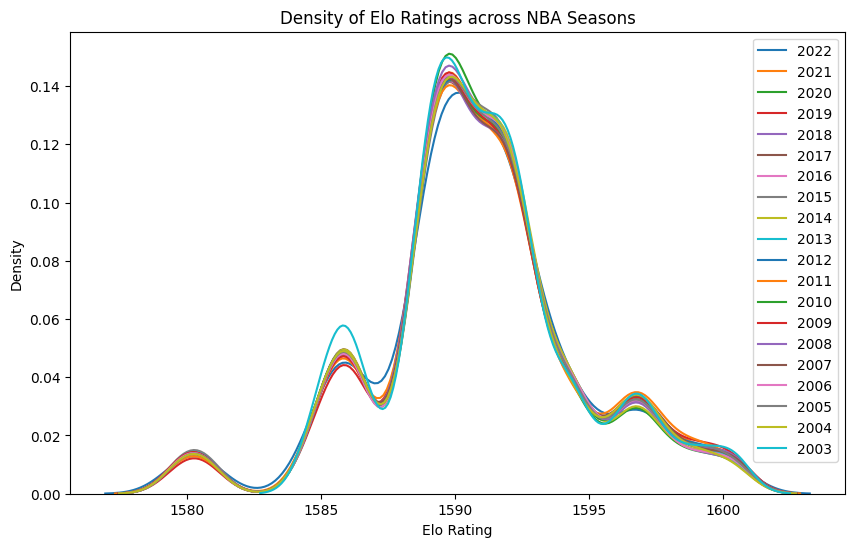

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Extract the unique seasons from the 'games_df'
seasons = games_df['SEASON'].unique()

# Iterate over each season
for season in seasons:
    # Select data for the current season
    season_data = games_df[games_df['SEASON'] == season]
    elo_ratings = season_data[['Elo_Home', 'Elo_away']].values.flatten()
    
    # Plot the density curve for the current season
    sns.kdeplot(elo_ratings, label=season)

# Set the plot title and labels
plt.title('Density of Elo Ratings across NBA Seasons')
plt.xlabel('Elo Rating')
plt.ylabel('Density')

# Show the legend
plt.legend()

# Display the plot
plt.show()


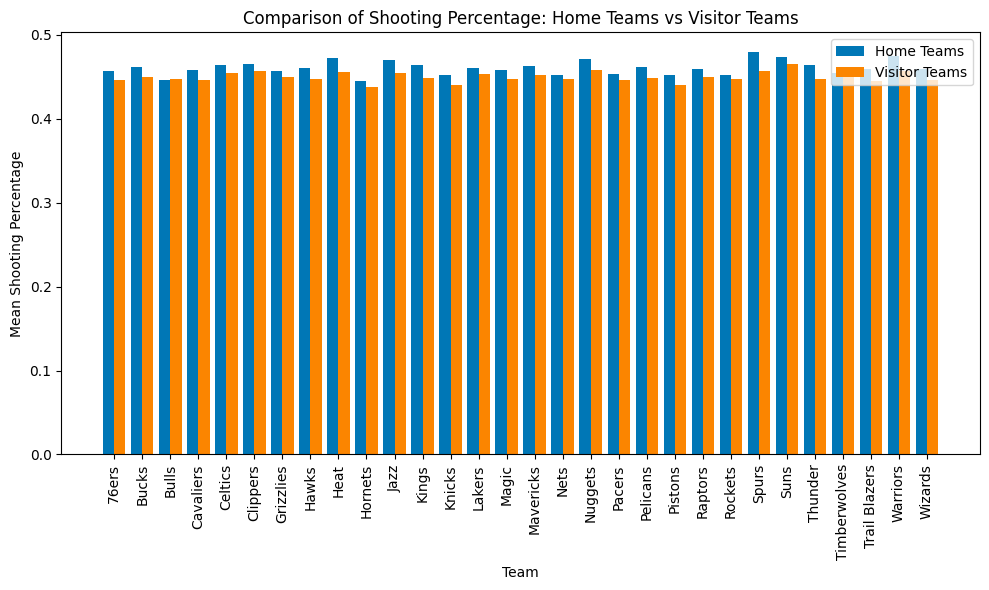

In [43]:
# Calculate the mean shooting percentage for home teams and visitor teams
home_pct = games_df.groupby('home_team')['FG_PCT_home'].mean()
visitor_pct = games_df.groupby('visitor_team')['FG_PCT_away'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x-axis positions
hor = np.arange(len(home_pct))

# Plot the bar chart
plt.bar(hor, home_pct, width=0.4, color='#0077b6', label='Home Teams')
plt.bar(hor + 0.4, visitor_pct, width=0.4, color='#fb8500', label='Visitor Teams')

# Set the x-axis labels
plt.xticks(hor + 0.2, home_pct.index)

# Set the title and axis labels
plt.title('Comparison of Shooting Percentage: Home Teams vs Visitor Teams')
plt.xlabel('Team')
plt.ylabel('Mean Shooting Percentage')

# Display the legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


### Spliting

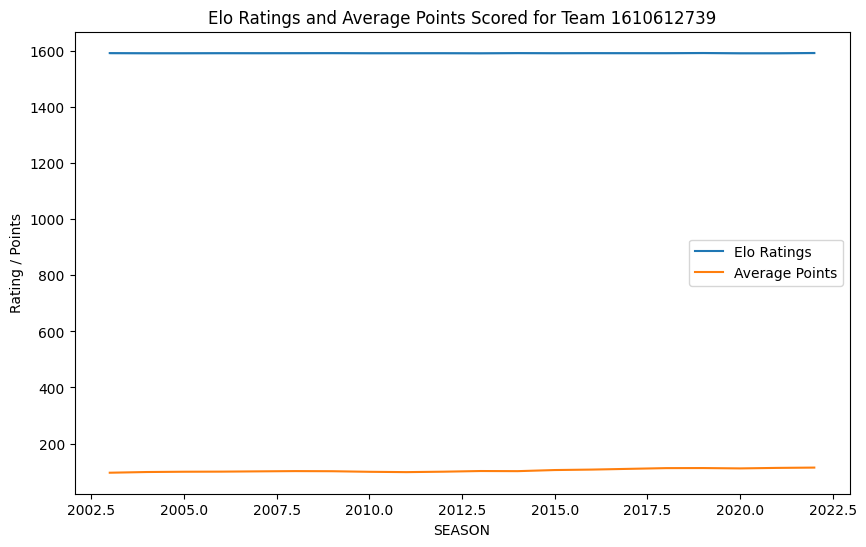

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a random team
random_team = games_df['TEAM_ID_home'].sample(1).values[0]

# Filter the data for the selected team
team_data = games_df[(games_df['TEAM_ID_home'] == random_team) | (games_df['TEAM_ID_away'] == random_team)]

# Calculate average points scored per season
average_points = team_data.groupby('SEASON')['PTS_home'].mean()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the Elo Ratings and average points scored
sns.lineplot(x=team_data['SEASON'], y=team_data['Elo_Home'], label='Elo Ratings')
sns.lineplot(x=average_points.index, y=average_points.values, label='Average Points')

# Set the plot title and labels
plt.title(f'Elo Ratings and Average Points Scored for Team {random_team}')
plt.xlabel('SEASON')
plt.ylabel('Rating / Points')

# Show the legend
plt.legend()

# Display the plot
plt.show()


## Classifiers and Evaluating the model's performance :

In [14]:
# IMPORTS
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix


## RandomForestClassifier

In [25]:
from sklearn.model_selection import GridSearchCV

# Define the features
features = ['TEAM_ID_home', 'TEAM_ID_away','Win_Pct_as_Visitor_Team','Win_Pct_as_Home_Team','RTP_home','RTP_away','Elo_Home','Elo_away']
# Remove NaN values from the specified features
games_df = games_df.dropna(subset=features)

X = games_df[features]
y = games_df['HOME_TEAM_WINS']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifier
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Get the predictions on the training data
y_train_pred = classifier.predict(X_train)

# Calculate precision
precision = precision_score(y_train, y_train_pred)

# Calculate accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Calculate recall
recall = recall_score(y_train, y_train_pred)

# Calculate true positive rate (TPR)
confusion_mat = confusion_matrix(y_train, y_train_pred)
tp = confusion_mat[1, 1]
fn = confusion_mat[1, 0]
tn = confusion_mat[0, 0]
fp = confusion_mat[0, 1]
tpr = tp / (tp + fn)

# Calculate true negative rate (TNR)
tnr = tn / (tn + fp)

# Create a dataframe to store the results
result_df = pd.DataFrame({'Metrics': ['Precision', 'Accuracy', 'Recall', 'True Positive Rate (TPR)', 'True Negative Rate (TNR)'],
                          'Random Forest Classifier': [precision, accuracy, recall, tpr, tnr]})
result_df.head()

,Metrics,Random Forest Classifier
0,Precision,0.693104
1,Accuracy,0.713374
2,Recall,0.917657
3,True Positive Rate (TPR),0.917657
4,True Negative Rate (TNR),0.423571


## SVM :

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the features
features = ['TEAM_ID_home', 'TEAM_ID_away','Win_Pct_as_Visitor_Team','Win_Pct_as_Home_Team','RTP_home','RTP_away','Elo_Home','Elo_away']

# Get rid of rows with missing values
games_df = games_df.dropna(subset=features)

# Split the data into features (X) and target (y)
X = games_df[features]
y = games_df['HOME_TEAM_WINS']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the SVM classifier and fit it to the training data
classifier = SVC(C=0.01)
classifier.fit(X_train, y_train)

# Get the predictions on the training data
y_train_pred = classifier.predict(X_train)

# Calculate performance metrics
precision = precision_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
confusion_mat = confusion_matrix(y_train, y_train_pred)
tp = confusion_mat[1, 1]
fn = confusion_mat[1, 0]
tn = confusion_mat[0, 0]
fp = confusion_mat[0, 1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Update the result dataframe
result_df['Support Vector Machine'] = [precision, accuracy, recall, tpr, tnr]
result_df.head()

,Metrics,Random Forest Classifier,Support Vector Machine
0,Precision,0.693104,0.586790
1,Accuracy,0.713374,0.586867
2,Recall,0.917657,0.999452
3,True Positive Rate (TPR),0.917657,0.999452
4,True Negative Rate (TNR),0.423571,0.001556


## logistic regression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define the features
features = ['TEAM_ID_home', 'TEAM_ID_away','Win_Pct_as_Visitor_Team','Win_Pct_as_Home_Team','RTP_home','RTP_away','Elo_Home','Elo_away']

# Get rid of rows with missing values
games_df = games_df.dropna(subset=features)

# Split the data into features (X) and target (y)
X = games_df[features]
y = games_df['HOME_TEAM_WINS']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression classifier and fit it to the training data
classifier = LogisticRegression(C=0.01)
classifier.fit(X_train, y_train)

# Get the predictions on the training data
y_train_pred = classifier.predict(X_train)

# Calculate performance metrics
precision = precision_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
confusion_mat = confusion_matrix(y_train, y_train_pred)
tp = confusion_mat[1, 1]
fn = confusion_mat[1, 0]
tn = confusion_mat[0, 0]
fp = confusion_mat[0, 1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Update the result dataframe
result_df['Logistic Regression'] = [precision, accuracy, recall, tpr, tnr]
result_df.head()

,Metrics,Random Forest Classifier,Support Vector Machine,Logistic Regression
0,Precision,0.693104,0.586790,0.616134
1,Accuracy,0.713374,0.586867,0.606238
2,Recall,0.917657,0.999452,0.876964
3,True Positive Rate (TPR),0.917657,0.999452,0.876964
4,True Negative Rate (TNR),0.423571,0.001556,0.219501


## KNeighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(games_df[features], games_df['HOME_TEAM_WINS'], test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [2, 3,7, 4], 
    'weights': ['uniform', 'distance']
}

# Create the KNN classifier
classifier = KNeighborsClassifier()

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(classifier, param_grid, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the KNN classifier with the best parameters
classifier = KNeighborsClassifier(**best_params)
classifier.fit(X_train, y_train)

# Predict on the training data and the testing data
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate performance metrics
precision = precision_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
confusion_mat = confusion_matrix(y_train, y_train_pred)
tp = confusion_mat[1, 1]
fn = confusion_mat[1, 0]
tn = confusion_mat[0, 0]
fp = confusion_mat[0, 1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Update the result dataframe
result_df['KNeighbors Classifier'] = [precision, accuracy, recall, tpr, tnr]
result_df.head()

,Metrics,Random Forest Classifier,Support Vector Machine,Logistic Regression,KNeighbors Classifier
0,Precision,0.693104,0.586790,0.616134,0.707515
1,Accuracy,0.713374,0.586867,0.606238,0.690244
2,Recall,0.917657,0.999452,0.876964,0.807033
3,True Positive Rate (TPR),0.917657,0.999452,0.876964,0.807033
4,True Negative Rate (TNR),0.423571,0.001556,0.219501,0.523408


## Naive Bayes


In [29]:
from sklearn.naive_bayes import GaussianNB

# Create the GaussianNB classifier
classifier = GaussianNB()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = classifier.predict(X_train)

# Calculate performance metrics
precision = precision_score(y_train, y_train_pred)
accuracy = accuracy_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
confusion_mat = confusion_matrix(y_train, y_train_pred)
tp = confusion_mat[1, 1]
fn = confusion_mat[1, 0]
tn = confusion_mat[0, 0]
fp = confusion_mat[0, 1]
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

# Update the result dataframe
result_df['Naive Bayes'] = [precision, accuracy, recall, tpr, tnr]
result_df.head()

,Metrics,Random Forest Classifier,Support Vector Machine,Logistic Regression,KNeighbors Classifier,Naive Bayes
0,Precision,0.693104,0.586790,0.616134,0.707515,0.634610
1,Accuracy,0.713374,0.586867,0.606238,0.690244,0.600328
2,Recall,0.917657,0.999452,0.876964,0.807033,0.755602
3,True Positive Rate (TPR),0.917657,0.999452,0.876964,0.807033,0.755602
4,True Negative Rate (TNR),0.423571,0.001556,0.219501,0.523408,0.378517
